# Visualize the Data

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline  

## Load data

In [6]:
df_power = []
for i in range(1,11):
    df_power_zone = pd.read_csv('../data/Task 15/Task15_W_Zone1_10/Task15_W_Zone'+str(i)+'.csv', 
                                header=0, 
                                usecols=[1, 2], 
                                names=['datetime', 'wf'+str(i)])
    df_power_zone['datetime'] = pd.to_datetime(df_power_zone['datetime'], format='%Y%m%d %H:%M')
    df_power_zone.index = df_power_zone['datetime']
    df_power_zone = df_power_zone.drop(['datetime'], axis=1)
    df_power.append(df_power_zone)
df_power = pd.concat(df_power, axis=1, join='outer')

Check datetime range. 

In [7]:
print(df_power.index[0])
print(df_power.index[-1])
df_power.head()

2012-01-01 01:00:00
2013-12-01 00:00:00


,wf1,wf2,wf3,wf4,wf5,wf6,wf7,wf8,wf9,wf10
datetime,,,,,,,,,,
2012-01-01 01:00:00,0.000000,0.596273,0.425465,0.378229,0.273678,0.268101,0.000000,0.000000,0.0,0.594361
2012-01-01 02:00:00,0.054879,0.411180,0.363851,0.063012,0.086796,0.034542,0.014708,0.014954,0.0,0.569679
2012-01-01 03:00:00,0.110234,0.167243,0.297129,0.036704,0.006811,0.020621,0.035098,0.071785,0.0,0.330539
2012-01-01 04:00:00,0.165116,0.037326,0.235438,0.034342,0.018646,0.001867,0.045055,0.066796,0.0,0.211308
2012-01-01 05:00:00,0.156940,0.051206,0.120904,0.033554,0.034812,0.015174,0.050160,0.034797,0.0,0.172140


### Clean data

Check how many NaNs for each time series. 

In [8]:
df_power.isnull().sum()

wf1     11
wf2     13
wf3     88
wf4      0
wf5      0
wf6      0
wf7      0
wf8      0
wf9      0
wf10     0
dtype: int64

In [9]:
df_power = df_power.fillna(method='ffill')

In [10]:
df_power.isnull().sum()

wf1     0
wf2     0
wf3     0
wf4     0
wf5     0
wf6     0
wf7     0
wf8     0
wf9     0
wf10    0
dtype: int64

Check if there are any duplicated datetimes. 

In [11]:
df_power.index.duplicated().sum()

0

Check if there are any missing datetimes. 

In [12]:
df_ideal = pd.DatetimeIndex(start=df_power.index[0], end=df_power.index[-1], freq='1H')
missing = df_ideal.shape[0]-df_power.shape[0]
missing

C:\Users\semal\Anaconda3.3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


0

### Plot data

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_power)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1','2','3','4','5','6','7','8','9','10'])

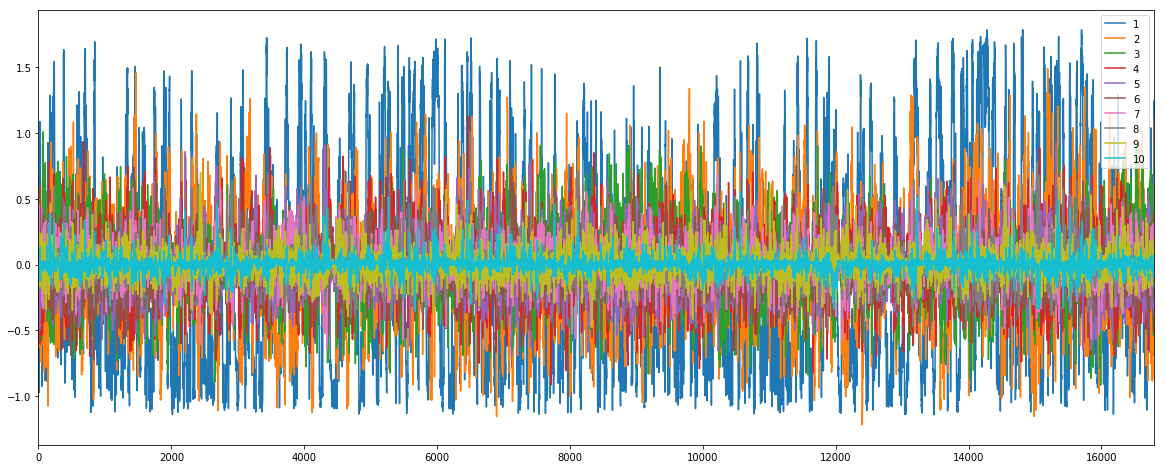

In [21]:
principalDf.plot(figsize=(20,8));

## Wind power time series

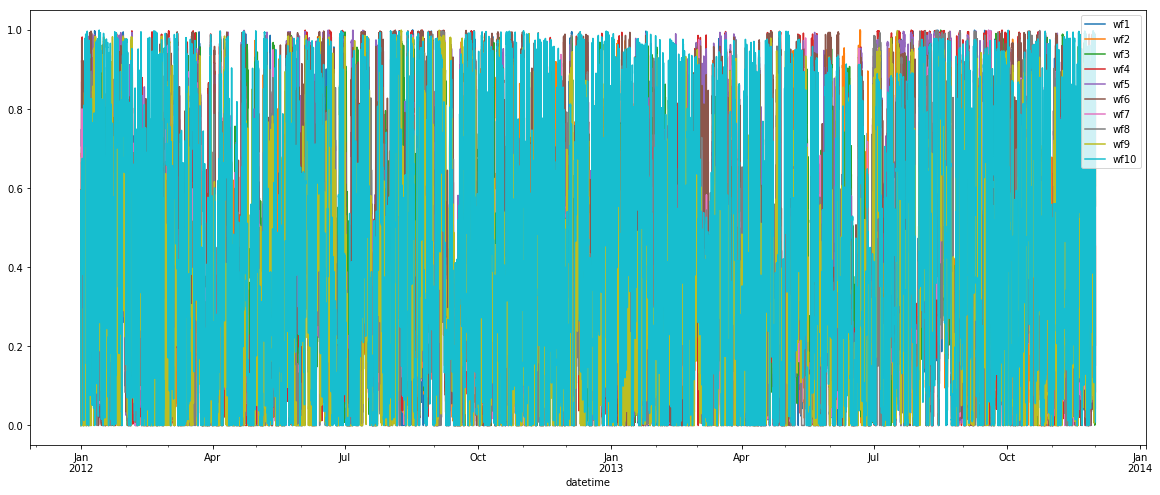

In [14]:
df_power.plot(figsize=(20,8));